<a href="https://colab.research.google.com/github/SilverWithA/mini_project_MLops/blob/main/randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1.파일 분리하기 (8:2 비율)


In [2]:
import csv
import random

def split_csv(input_file, output_file1, output_file2, split_ratio):
    with open(input_file, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # 헤더를 읽어옵니다.

        # 출력 파일들을 열고 헤더를 씁니다.
        with open(output_file1, 'w', newline='') as file1, open(output_file2, 'w', newline='') as file2:
            writer1 = csv.writer(file1)
            writer1.writerow(header)
            writer2 = csv.writer(file2)
            writer2.writerow(header)

            data = list(reader)

            split_index = int(len(data) * split_ratio)  # 분할 기준 인덱스 계산

            random.shuffle(data)  # 데이터를 무작위로 섞습니다.

            for i, row in enumerate(data):
                if i < split_index:  # 80%를 첫 번째 파일에 저장
                    writer1.writerow(row)
                else:  # 나머지 20%를 두 번째 파일에 저장
                    writer2.writerow(row)

    print("CSV 파일이 분할되었습니다.")

# CSV 파일 분할을 위한 예시 호출
split_csv('/content/drive/MyDrive/temp_new2.csv', '/content/drive/MyDrive/temp_train3.csv', '/content/drive/MyDrive/temp_test3.csv', 0.8)

CSV 파일이 분할되었습니다.


In [3]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/temp_train3.csv')
train = train.drop_duplicates()

test= pd.read_csv('/content/drive/MyDrive/temp_test3.csv')
test = test.drop_duplicates()


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430841 entries, 0 to 2013763
Data columns (total 29 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   USER_ID_hash                1430841 non-null  object
 1   REG_DATE                    1430841 non-null  object
 2   SEX_ID                      1430841 non-null  object
 3   AGE                         1430841 non-null  int64 
 4   Tr_Pref_Name                1162512 non-null  object
 5   Tr_small_area_name          1430841 non-null  object
 6   Translated_capsule_text     1430841 non-null  object
 7   Translated_genre_name       1430841 non-null  object
 8   VIEW_COUPON_ID_hash         1430841 non-null  object
 9   usable_date_sum             1430841 non-null  int64 
 10  view_count                  1430841 non-null  int64 
 11  PRICE_RATE                  1430841 non-null  int64 
 12  DISCOUNT_PRICE              1430841 non-null  int64 
 13  VALIDPERIOD 

In [5]:
# train[COL_CAT].head()

In [6]:
# train.head()

In [7]:
y_train=train[['Translated_genre_name']]

X_train =train.drop(['VIEW_COUPON_ID_hash'],1)
X_test = test.drop(['VIEW_COUPON_ID_hash' ],1)

<ipython-input-7-935c0da0af74>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train =train.drop(['VIEW_COUPON_ID_hash'],1)
<ipython-input-7-935c0da0af74>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = test.drop(['VIEW_COUPON_ID_hash' ],1)


In [8]:
#상관관계 그래프 그리기
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# data = train
# correlation_matrix = data.corr()

# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt=".1f", linewidths=0.5, xticklabels=True, yticklabels=True, annot_kws={"fontsize": 8})
# plt.title('Correlation Heatmap')
# plt.xticks(rotation=45, ha='right', fontsize=8)
# plt.yticks(rotation=0, fontsize=8)
# plt.tight_layout(pad=1.0)

# plt.savefig('correlation_heatmap.png', dpi=300)

#2.상관관계가 높은 변수 파악

In [9]:
# import numpy as np

# # 상관관계 행렬 계산
# corr_matrix = train.corr().abs()

# # 상관계수가 높은 변수 제거
# threshold = 0.8  # 상관계수 임계값 설정

# # 다중 공선성이 있는 변수 선택 및 제거
# upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
# high_correlation_cols = [column for column in corr_matrix.columns if any(corr_matrix.loc[upper_triangle, column] > threshold)]
# train2 = train.drop(high_correlation_cols, axis=1)


In [10]:
# corr_matrix2 = test.corr().abs()

# # 상관계수가 높은 변수 제거
# threshold = 0.8  # 상관계수 임계값 설정

# # 다중 공선성이 있는 변수 선택 및 제거
# upper_triangle = np.triu(np.ones(corr_matrix2.shape), k=1).astype(bool)
# high_correlation_cols = [column for column in corr_matrix2.columns if any(corr_matrix2.loc[upper_triangle, column] > threshold)]
# test2 = test.drop(high_correlation_cols, axis=1)

In [11]:
# test.head()

3.결측치 제거

In [12]:
#nan 렬 삭제하기
train.dropna(inplace=True)
test.dropna(inplace=True)

4.변수 형변환

In [13]:
#날짜 데이터 형변환하기
X_train['REG_DATE'] = pd.to_datetime(X_train['REG_DATE'])
X_train['YEAR'] = X_train['REG_DATE'].dt.year
X_train['MONTH']=X_train['REG_DATE'].dt.month
X_train['DAY']=X_train['REG_DATE'].dt.day

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430841 entries, 0 to 2013763
Data columns (total 31 columns):
 #   Column                      Non-Null Count    Dtype              
---  ------                      --------------    -----              
 0   USER_ID_hash                1430841 non-null  object             
 1   REG_DATE                    1430841 non-null  datetime64[ns, UTC]
 2   SEX_ID                      1430841 non-null  object             
 3   AGE                         1430841 non-null  int64              
 4   Tr_Pref_Name                1162512 non-null  object             
 5   Tr_small_area_name          1430841 non-null  object             
 6   Translated_capsule_text     1430841 non-null  object             
 7   Translated_genre_name       1430841 non-null  object             
 8   usable_date_sum             1430841 non-null  int64              
 9   view_count                  1430841 non-null  int64              
 10  PRICE_RATE                  14

In [15]:
# COL_DEL=['USER_ID_hash']
# COL_DATE=['YEAR','MONTH','DAY']
# # COL_NUM=['AGE','DISCOUNT_PRICE']
# # COL_NUM = ['AGE','DISPPERIOD', 'usable_date_sum',
# #        'view_count','PRICE_RATE','DISCOUNT_PRICE','PURCHASE_FLG','VALIDPERIOD']
# COL_CAT=[ 'SEX_ID', 'Tr_Pref_Name',
#        'Tr_small_area_name', 'Translated_capsule_text',
#        'Translated_genre_name' ]
# # COL_CAT=['SEX_ID', 'Tr_Pref_Name',
# #        'Tr_small_area_name',
# #        ]
# COL_Y=['Translated_genre_name']





5.변수형 태에 따른 분류

In [16]:
COL_DEL=['USER_ID_hash']
COL_DATE=['YEAR','MONTH','DAY']
COL_NUM=['PURCHASE_FLG','DISCOUNT_PRICE']
COL_CAT=['SEX_ID', 'Tr_Pref_Name',
       'Tr_small_area_name',
       ]
COL_Y=['Translated_genre_name']

In [17]:
train[COL_NUM].tail()

,PURCHASE_FLG,DISCOUNT_PRICE
2013751,0,1370
2013752,0,7200
2013754,0,1180
2013758,0,2840
2013763,0,4980


6.모델 나누기

In [18]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(X_train[COL_NUM+COL_CAT+COL_DATE],y_train[COL_Y].values.ravel(),test_size = 0.2,stratify=y_train[COL_Y])


7.변수 스케일링

In [19]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_tr[COL_NUM] = scaler.fit_transform(X_tr[COL_NUM])
X_val[COL_NUM] = scaler.transform(X_val[COL_NUM])
X_test[COL_NUM] = scaler.transform(X_test[COL_NUM])

In [20]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


X =pd.concat([X_train[COL_CAT],X_test[COL_CAT]])

for col in COL_CAT:
  le.fit(X[col])
  X_tr[col] = le.transform(X_tr[col])
  X_val[col] = le.transform(X_val[col])
  X_test[col] = le.transform(X_test[col])

In [21]:
# from imblearn.over_sampling import RandomOverSampler

# # 타겟 데이터와 피처 데이터 준비

# # RandomOverSampler 객체 생성
# oversampler = RandomOverSampler()

# # 오버 샘플링 수행
# X_tr,y_tr = oversampler.fit_resample(X_tr, y_tr)

In [22]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state = 42)
# X_tr, y_tr = smote.fit_resample(X_tr, y_tr)
# print('SMOTE 적용 전 학습용 피처/레이블 데이터 셋 :', X_tr.shape, y_tr.shape)
# # # print('SMOTE 적용 후 학습용 피처/레이블 데이터 셋 :', x_tr_over.shape, y_train_over.shape)
# print('SMOTE 적용 후 전 분포 :\n', pd.Series(y_tr).value_counts())


#8.RandomForestClassifier 모델학습

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state =42)
model_rf.fit(X_tr, y_tr)
print("Model training finished.")

Model training finished.


9.모델 성능 예측하기

In [24]:
predict_rf = model_rf.predict(X_val)
from sklearn.metrics import accuracy_score
score_rf = accuracy_score(y_val,predict_rf)
print(score_rf)

0.7687834810898455


In [25]:
predict_rf_tr = model_rf.predict(X_tr)
from sklearn.metrics import accuracy_score
score_rf_tr = accuracy_score(y_tr,predict_rf_tr)
print(score_rf_tr)


0.95586333901764


In [26]:

#최적의 파라미터 찾는 코드 - 실행시간이 너무 오래걸
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # 데이터 준비
# X_train = X_tr
# y_train = y_tr

# # 랜덤 서치를 위한 하이퍼파라미터 분포 설정
# param_distribution = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# # 모델 및 랜덤 서치 객체 생성
# model = RandomForestClassifier(random_state=42)
# random_search = RandomizedSearchCV(model, param_distribution, n_iter=10, cv=5)

# # 랜덤 서치 수행
# random_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터와 최고 성능 출력
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

In [27]:
X_test['REG_DATE'] = pd.to_datetime(X_test['REG_DATE'])
X_test['YEAR'] = X_test['REG_DATE'].dt.year
X_test['MONTH']=X_test['REG_DATE'].dt.month
X_test['DAY']=X_test['REG_DATE'].dt.day



In [28]:
X_test.columns

Index(['USER_ID_hash', 'REG_DATE', 'SEX_ID', 'AGE', 'Tr_Pref_Name',
       'Tr_small_area_name', 'Translated_capsule_text',
       'Translated_genre_name', 'usable_date_sum', 'view_count', 'PRICE_RATE',
       'DISCOUNT_PRICE', 'VALIDPERIOD', 'DISPPERIOD', 'PURCHASE_FLG',
       'dispfrom', 'dispend', 'usable_date_mon', 'usable_date_tue',
       'usable_date_wed', 'usable_date_thu', 'usable_date_fri',
       'usable_date_sat', 'usable_date_sun', 'usable_date_holiday',
       'usable_date_before_holiday', 'Male', 'Female', 'YEAR', 'MONTH', 'DAY'],
      dtype='object')

#10.테스트 값 예측하기

In [29]:
pred= model_rf.predict(X_test[COL_NUM+COL_CAT+COL_DATE])
result = pd.DataFrame({'ID':X_test.USER_ID_hash,'pred':pred})
result.tail()

,ID,pred
503435,8def6945f101847ef1747d08e307146a,기타 쿠폰
503437,89fe6f79b987530bf2757b807194a0e4,택배
503438,7958f18dc3b9b6e8a59acbb2bdb2d993,택배
503440,fe7e29cd67a818747fff9fba44fc5ffd,음식
503441,0137f73c8754c26c02e99758400aa898,택배


In [30]:
X_test.tail()

,USER_ID_hash,REG_DATE,SEX_ID,AGE,Tr_Pref_Name,Tr_small_area_name,Translated_capsule_text,Translated_genre_name,usable_date_sum,view_count,...,usable_date_fri,usable_date_sat,usable_date_sun,usable_date_holiday,usable_date_before_holiday,Male,Female,YEAR,MONTH,DAY
503435,8def6945f101847ef1747d08e307146a,2011-06-09 14:33:20+00:00,0,45,38,22,기타,기타 쿠폰,0,2645,...,0,0,0,0,0,0,1,2011,6,9
503437,89fe6f79b987530bf2757b807194a0e4,2011-03-05 22:22:57+00:00,0,26,27,7,택배,택배,0,221,...,0,0,0,0,0,0,1,2011,3,5
503438,7958f18dc3b9b6e8a59acbb2bdb2d993,2012-01-05 00:10:17+00:00,0,29,10,3,휴식,휴식,8,41,...,1,1,1,1,1,0,1,2012,1,5
503440,fe7e29cd67a818747fff9fba44fc5ffd,2011-08-10 14:54:03+00:00,0,43,10,22,음식,음식,6,640,...,1,1,0,0,0,0,1,2011,8,10
503441,0137f73c8754c26c02e99758400aa898,2012-02-09 07:17:57+00:00,0,46,29,3,택배,택배,0,741,...,0,0,0,0,0,0,1,2012,2,9


In [31]:
#한글깨짐
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

11.변수들의 정확도, 재현율, 정밀도 파악하기

In [32]:
from sklearn.metrics import  precision_score,recall_score
actual = y_val
predicted = predict_rf
accuracy = accuracy_score(actual, predicted)
print("Accuracy:", accuracy)

# 정밀도 계산
precision = precision_score(actual, predicted,average='macro')
print("Precision:", precision)

# 재현율 계산
recall = recall_score(actual, predicted,average='macro')
print("Recall:", recall)

Accuracy: 0.7687834810898455
Precision: 0.575184133314314
Recall: 0.4669331170698158


In [33]:
from sklearn.metrics import classification_report


# 클래스별 분류 보고서 생성
report = classification_report(actual, predicted)

# 분류 보고서 출력
print(report)

              precision    recall  f1-score   support

       건강・의료       0.58      0.26      0.36       310
       기타 쿠폰       0.69      0.52      0.59     20307
      기프트 카드       0.61      0.56      0.58      7640
       네일・아이       0.43      0.32      0.37      2926
          레슨       0.74      0.45      0.56      3118
          레저       0.73      0.53      0.61      9328
          뷰티       0.13      0.07      0.09       208
        에스테틱       0.31      0.18      0.23      3413
          음식       0.74      0.78      0.76     70141
          택배       0.78      0.84      0.81     90891
       헤어 살롱       0.52      0.41      0.46      4993
       호텔・여관       0.88      0.93      0.90     67517
          휴식       0.37      0.22      0.27      5377

    accuracy                           0.77    286169
   macro avg       0.58      0.47      0.51    286169
weighted avg       0.76      0.77      0.76    286169



#12.변수 중요도 파악하기

In [34]:
import numpy as np
import matplotlib.pyplot as plt
importances =model_rf.feature_importances_
feature_names = X_tr.columns

# 중요도를 내림차순으로 정렬하여 시각화합니다
indices = np.argsort(importances)[::-1]


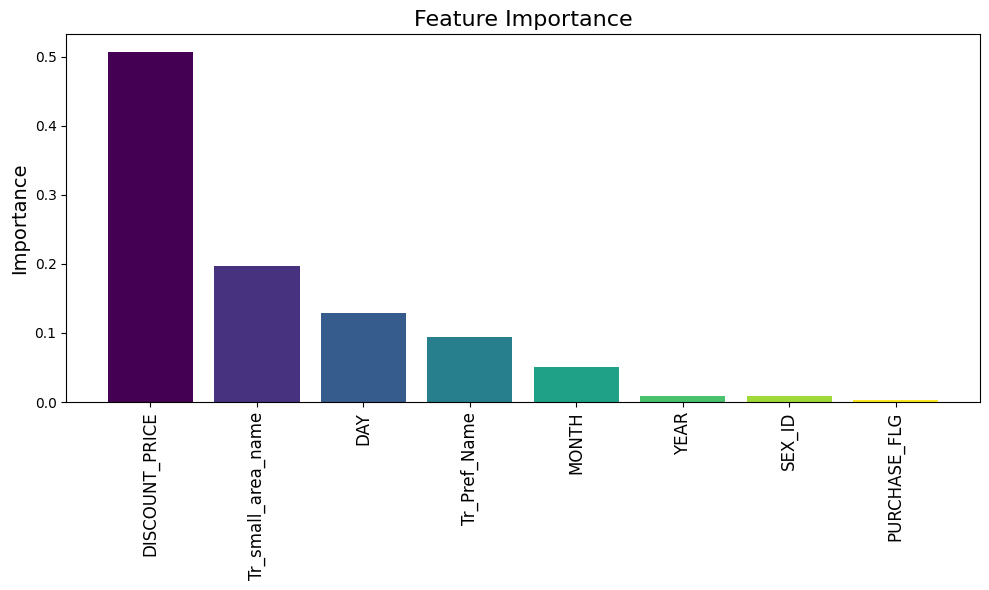

In [35]:
# 색상 맵 정의
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))
# 그래프 크기 설정
plt.figure(figsize=(10, 6))
# 그래프 제목 설정
plt.title("Feature Importance", fontsize=16)
# 막대 그래프 그리기
plt.bar(range(len(feature_names)), importances[indices], color=colors)
# x축 눈금과 레이블 설정
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90, fontsize=12)
# y축 레이블 설정
plt.ylabel("Importance", fontsize=14)
# 그래프 내부 여백 조정
plt.tight_layout()
# 그래프 출력
plt.show()

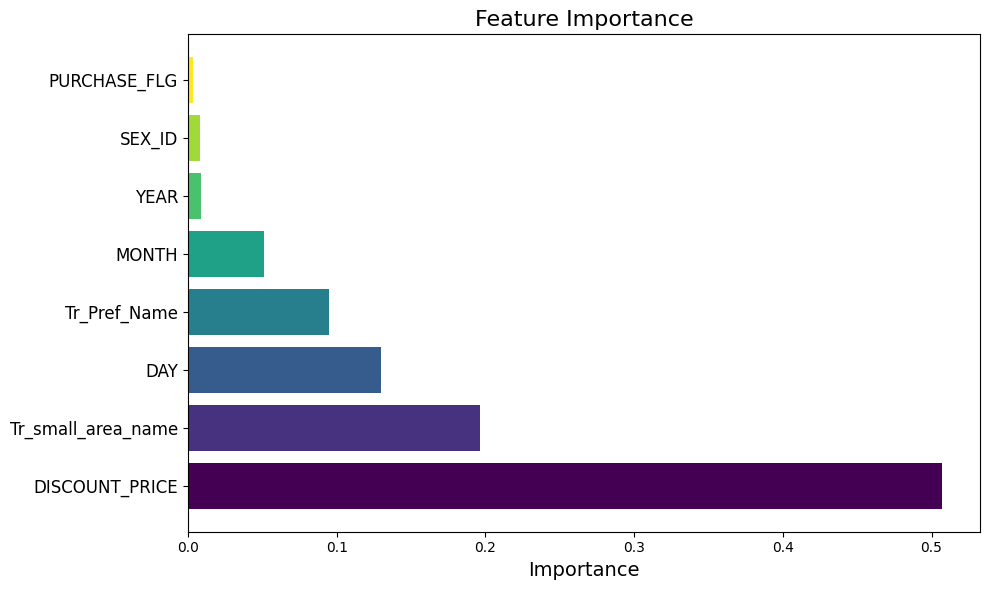

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 색상 맵 정의
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 그래프 제목 설정
plt.title("Feature Importance", fontsize=16)

# 가로 막대 그래프 그리기
plt.barh(range(len(feature_names)), importances[indices], color=colors)

# y축 눈금과 레이블 설정
plt.yticks(range(len(feature_names)), feature_names[indices], fontsize=12)

# x축 레이블 설정
plt.xlabel("Importance", fontsize=14)

# 그래프 내부 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()